In [39]:
%matplotlib inline
import math
import numpy as np
from matplotlib import pyplot as plt

0) Finish the implementation of false positon method. Use it to find the solution for $\sin(x) + 1 = x$ do it 20 times.

1) Give me the solution to $x = e^{-x}$ that is $10^{-6}$ using bisection method.

Pick the initial bound from the following and explain why you can't pick the other one.
Bound A: (-1,0), Bound B (0,1)

(-5, 5)

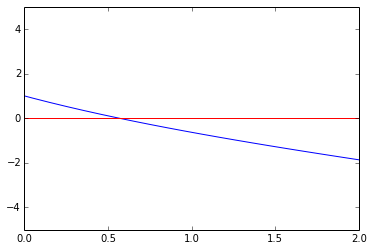

In [2]:
xs = np.linspace(-5, 5, 100)
ys = np.e**(-xs) - xs

plt.plot(xs, ys)
plt.axhline(0, c='r')
plt.xlim(0, 2)
plt.ylim(-5, 5)

Pick B since x interception is not in bound A

In [3]:
def findInt(fm, to):
    def cal(x):
        return np.e**(-x) - x
    
    mid = (fm + to)/2.
    if (np.abs(cal(mid)) <= 1e-6):
        return mid
    else:
        if (cal(mid) <= 0 and cal(fm) >= 0):
            return findInt(fm, mid)
        else:
            return findInt(mid, to)

In [4]:
ans = findInt(0, 1)

(-5, 5)

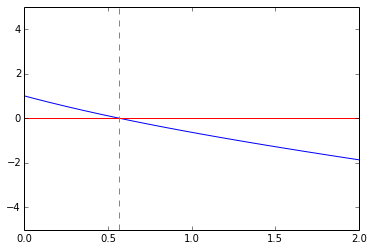

In [5]:
xs = np.linspace(-5, 5, 100)
ys = np.e**(-xs) - xs

plt.plot(xs, ys)
plt.axhline(0, c='r')
plt.axvline(ans, c='c', ls='--')
plt.xlim(0, 2)
plt.ylim(-5, 5)

2) Find all value of $x \in [0,1]$ such that $f(x)=0$ for

$f(x) = -0.000216747 + 0.0072868 x - 0.0977383 x^2 + 0.664685 x^3 - 
 2.40773 x^4 + 4.46766 x^5 - 3.7091 x^6 + x^7$
 
Make sure your answers are at most $10^{-6}$ away from the real solution.

In [6]:
def f(x):
    return -0.000216747 + 0.0072868*x - 0.0977383*x**2 + 0.664685*x**3 - \
            2.40773*x**4 + 4.46766*x**5 - 3.7091*x**6 + x**7

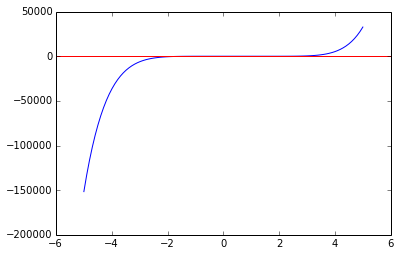

In [7]:
plt.plot(xs, f(xs))
plt.axhline(0, c = 'r')

(-1e-07, 1e-07)

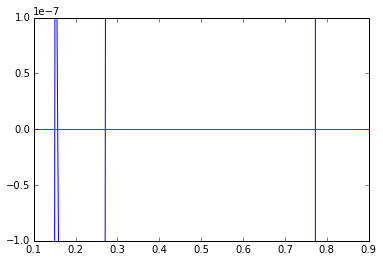

In [38]:
plt.plot(xs, f(xs))
plt.axhline(0, c = 'r')
plt.xlim(0.1, .9)
plt.ylim(-1e-7, 1e-7)

In [80]:
def findInt_wrapper(cal, lim):
    def findInt(fm, to):
        mid = (fm + to)/2.
        while (not np.abs(cal(mid)) <= lim):
            if cal(fm) * cal(mid) < 0:
                to = mid
            else:
                fm = mid
            mid = (fm + to)/2.
            if (fm == to): return None
        return mid
    return findInt
findInt = findInt_wrapper(f, 1e-6)

# def bi_wp(ff):
#     def bisection(l, r, n):
#         for i in range(n):
#             c = (l + r)/2.

#             Ei.append(np.abs(c - sol))

#             if ff(l) * ff(c) < 0:
#                 r = c
#             else:
#                 l = c
#         return c
#     return bisection
# findInt = bi_wp(f)

In [81]:
x1 = findInt(0, 0.13)
x2 = findInt(0.13, 0.23)
x3 = findInt(0.23, 0.34)
x4 = findInt(0.34, 1)

x_ints = [x1, x2, x3, x4]
print x_ints

[0.0975, 0.21750000000000003, 0.333125, 0.785411376953125]


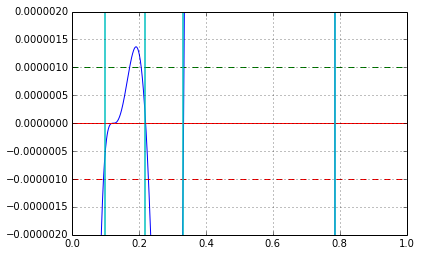

In [82]:
xs = np.linspace(0, 1, 1000)
plt.plot(xs, f(xs))
plt.axhline(0, c = 'r')
plt.xlim(0, 1)
plt.ylim(-2 * 1e-6, 2 * 1e-6)
plt.axhline(1e-6, c = 'g', ls='--')
plt.axhline(-1e-6, c = 'r', ls='--')
plt.grid(True)

for i in xrange(4):
    plt.axvline(x_ints[i], c = 'c', ls='-', lw=2, alpha=0.75)

2.1) Find all the local minima and maxima of the above function. How do you figure out whether it is a local maximum or local minimum

In [83]:
def f_dx(x):
    return 0.0072868 - 0.0977383*2*x + 0.664685*3*x**2 - \
            2.40773*4*x**3 + 4.46766*5*x**4 - 3.7091*6*x**5 + 7*x**6

In [106]:
def findInt_wrapper(cal, lim):
    def findInt(fm, to):
        mid = (fm + to)/2.
        while (not np.abs(cal(mid)) <= lim):
            if cal(fm) * cal(mid) < 0:
                to = mid
            else:
                fm = mid
            mid = (fm + to)/2.
            if (fm == to): return None
        return mid
    return findInt
findInt = findInt_wrapper(f_dx, 1e-7)

In [111]:
x2 = findInt(0.1, 0.2)
x3 = findInt(0.23, 0.4)
x4 = findInt(0.6, 0.8)

x_ints = [x2, x3, x4]
print x_ints

[0.191357421875, 0.29709106445312494, 0.6817806243896483]


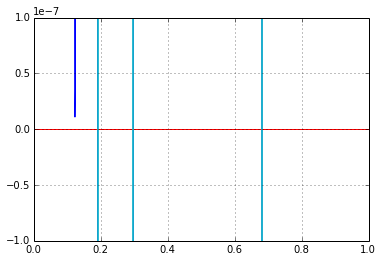

In [113]:
plt.plot(xs, f_dx(xs))
plt.axhline(0, c = 'r')
plt.xlim(0, 1)
plt.ylim(-1e-7, 1e-7)
plt.axhline(1e-6, c = 'g', ls='--')
plt.axhline(-1e-6, c = 'r', ls='--')
plt.grid(True)
for x_int in x_ints:
    plt.axvline(x_int, c = 'c', ls='-', lw=2, alpha=0.75)

In [121]:
# plt.plot(xs, f(xs))
# plt.axhline(0, c = 'r')
# plt.xlim(0, 1)
# plt.ylim(-1e-4, 1e-3)
# plt.axhline(1e-6, c = 'g', ls='--')
# plt.axhline(-1e-6, c = 'r', ls='--')
# plt.grid(True)
# for x_int in x_ints:
#     plt.axvline(x_int, c = 'c', ls='-', lw=2, alpha=0.75)

2.2) What is the `global maximum` and `global minimum` of the function above within the range $x\in[0,1]$

In [128]:
glob_max = (x_ints[0], f(x_ints[0]))
glob_min = (x_ints[0], f(x_ints[0]))

def compareMax(pair_1, pair_2):
    if pair_1[1] < pair_2[1]:
        return pair_2
    return pair_1

def compareMin(pair_1, pair_2):
    if pair_1[1] > pair_2[1]:
        return pair_2
    return pair_1


for x_int in x_ints:
    pair =  (x_int, f(x_int))
    
    glob_max = compareMax(glob_max, pair)
    glob_min = compareMin(glob_min, pair)

print glob_max
print glob_min

(0.6817806243896483, 0.0038258083219728095)
(0.29709106445312494, -1.214713659800727e-05)


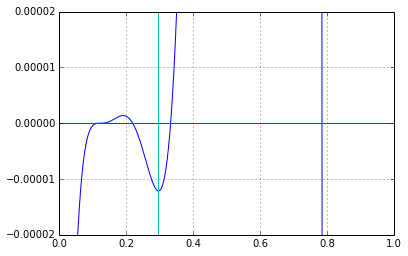

In [133]:
xs = np.linspace(0, 1, 1000)
plt.plot(xs, f(xs))
plt.axhline(0, c = 'r')
plt.xlim(0, 1)
plt.ylim(-2 * 1e-5, 2 * 1e-5)
plt.axvline(glob_min[0], c = 'c')
plt.grid(True)

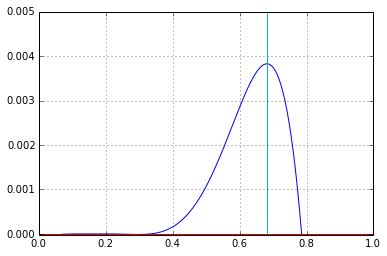

In [143]:
xs = np.linspace(0, 1, 1000)
plt.plot(xs, f(xs))
plt.axhline(0, c = 'r')
plt.xlim(0, 1)
plt.ylim(-2 * 1e-5, 1e-2/2)
plt.axvline(glob_max[0], c = 'c')
plt.grid(True)

3) Suppose you are saving up your money for your new phone which costs 15000 Baht.  You save 1k every month and spend the rest. The `yearly` interest rate is 2% the interest is paid continously(you get interest paid to your account every microsecond). How long do you need to wait. Your answer should not be more than one second away from the real answer.

$\mbox{Let } 1 \mbox{ month } = 30 \mbox{ days} $ 


$\therefore \, 1 \mbox{ month } = 30 \times 24 \times 60 \times 60 \times 10^6 = 2592000000000.0 \mbox{ micro-sec}$


$\therefore \, 1 \mbox{ year } = 12 \times 30 \times 24 \times 60 \times 60 \times 10^6 = 31104000000000.0 \mbox{ micro-sec}$

In [36]:
30 * 24 * 60 * 60 * 1e6

2592000000000.0

$$ 1000 \left( 1 + (\dfrac{1.02}{12})^{2592000000000.0} + (\dfrac{1.02}{12})^{2592000000000.0 \times 2} + ... + (\dfrac{1.02}{12})^{2592000000000.0 \times t} \right) $$

$$ \mbox{Let S} = \left( 1 + (\dfrac{1.02}{31104000000000.0})^{1} + (\dfrac{1.02}{31104000000000.0})^{2} + ... + (\dfrac{1.02}{31104000000000.0})^t \right) $$

$$ S \times \dfrac{1.02}{31104000000000.0} = \left( \dfrac{1.02}{31104000000000.0} + 1 + (\dfrac{1.02}{31104000000000.0})^{1} + (\dfrac{1.02}{31104000000000.0})^{2} + ... + (\dfrac{1.02}{31104000000000.0})^{t-1} \right) $$

$$ S (\dfrac{1.02}{31104000000000.0} - 1) = \dfrac{1.02}{31104000000000.0} - (\dfrac{1.02}{31104000000000.0})^t$$

$$ S = \dfrac{\dfrac{1.02}{31104000000000.0} - \left(\dfrac{1.02}{31104000000000.0}\right)^t}{\dfrac{1.02}{31104000000000.0} - 1} $$

$$ 1000 \left( 1 + (\dfrac{1.02}{12})^{2592000000000.0} + (\dfrac{1.02}{12})^{2592000000000.0 \times 2} + ... + (\dfrac{1.02}{12})^{2592000000000.0 \times t} \right) $$

In [28]:
def calMoney(x, r, p):
    p = p * (30 * 24 * 60 * 60 * 1e6)
    r = r/(12 * 30 * 24 * 60 * 60 * 1e6)
    return x * (1 + r)**p

In [35]:
calMoney(100, 0)

100.0

In [56]:
def loopMe(xs):
#     mul = 30 * 24 * 60 * 60 * 1e6
#     r = 0.02 / (12 * 30 * 24 * 60 * 60 * 1e6)
    r = 0.02
    balance = 1000.
    ys = []
    for x in xs:
        balance = calMoney(balance, r, x)
        ys.append(balance)
    return ys

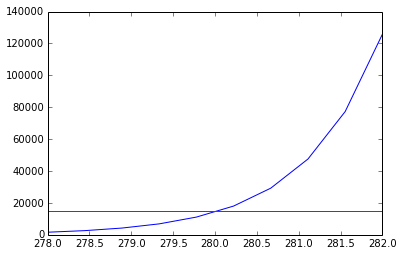

In [96]:
xs = np.linspace(278, 282, 10)
ys = loopMe(xs)
plt.plot(xs, ys)
plt.axhline(15000, c='r')
# plt.ylim(14900, 15100)

4) Full Width at Half Maximum(FWHM). Distribution width is a very important quantity. It tells you how wide a function is. One way to do that is to use a quantity called full-width half max.

This is the width of the distribution at half maximum. 

For example for distribution shown below the maximum is at x=0.0 and y=1.0

The maximum of this distribution is 1.0. So we are interested in the width of the distribution when the value of the distribution is 1.0/2=0.5

The width of the distribution is shown in black line. In this case it's about 2.35

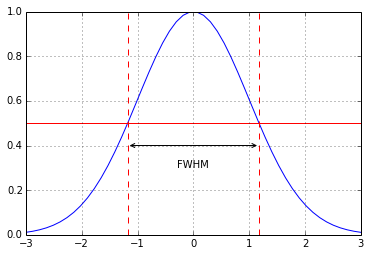

In [40]:
import math
def demo(x):
    return math.exp(-x**2/2.0)
x = np.linspace(-3,3)
y = [demo(xx) for xx in x]
plt.plot(x,y)
plt.axhline(0.5, color='red')

plt.axvline(2.355/2,color='red',linestyle='dashed')
plt.axvline(-2.355/2,color='red',linestyle='dashed')

plt.grid()
plt.annotate(
    '', xy=(-2.355/2, 0.4), xycoords='data',
    xytext=(2.355/2, 0.4), textcoords='data',
    arrowprops={'arrowstyle': '<->'})
plt.text(0,0.3,'FWHM',horizontalalignment ='center')

4.1)Find FWHM of the following function. Make sure the bound on error of the FWHM is less than $10^{-4}$.

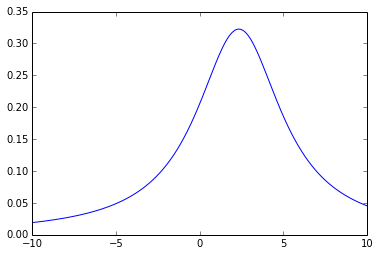

In [41]:
import math
def f(x, gamma=3.1):
    mu = 2.345
    return gamma/((x-mu)**2+gamma**2)
x = np.linspace(-10,10,200)
y = [f(xx) for xx in x]
plt.plot(x,y)

4.2) Plot FWHM(y-axis) as a function of $\gamma$(gamma) from $\gamma=0.5\ldots 3$. Make sure you have at least 30 points.

In [42]:
print f(1.0, gamma=0.2) # you may find this useful

0.108165114047


In [43]:
1.02/(30 * 24 * 60 * 60 * 1e6 * 12)

3.279320987654321e-14